<a href="https://colab.research.google.com/github/prajvalsudhir/Facemask-Detection/blob/master/facemask_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from matplotlib.image import imread
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [152]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [153]:
pwd

'/content'

In [0]:
data = '/content/gdrive/My Drive/Colab Notebooks/data'

In [155]:
os.listdir('/content/gdrive/My Drive/Colab Notebooks/data')

['test', 'train']

In [0]:
#lets split the data to train and test
#there are approx 680 images in withmask and withoutmask each 

In [0]:
#80% for train and 20% for test

In [158]:
(0.8*680)*2

1088.0

In [159]:
(0.2*680)*2

272.0

In [160]:
os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/train')

['without_mask', 'with_mask']

In [0]:
train_path = '/content/gdrive/My Drive/Colab Notebooks/data/train'
test_path = '/content/gdrive/My Drive/Colab Notebooks/data/test'

In [162]:
os.listdir(train_path+'/without_mask')

['105.jpg',
 '1.jpg',
 '110.jpg',
 '0.jpg',
 '10.jpg',
 '104.jpg',
 '102.jpg',
 '101.jpg',
 '107.jpg',
 '108.jpg',
 '111.jpg',
 '106.jpg',
 '11.jpg',
 '100.jpg',
 '109.jpg',
 '133.jpg',
 '184.jpg',
 '224.jpg',
 '168.jpg',
 '117.jpg',
 '215.jpg',
 '14.jpg',
 '194.jpg',
 '164.jpg',
 '174.jpg',
 '213.jpg',
 '152.jpg',
 '140.jpg',
 '22.jpg',
 '197.jpg',
 '17.jpg',
 '125.jpg',
 '153.jpg',
 '18.jpg',
 '143.jpg',
 '206.jpg',
 '115.jpg',
 '195.jpg',
 '178.jpg',
 '172.jpg',
 '163.jpg',
 '218.jpg',
 '2.jpg',
 '176.jpg',
 '173.jpg',
 '13.jpg',
 '135.jpg',
 '120.jpg',
 '151.jpg',
 '203.jpg',
 '131.jpg',
 '179.jpg',
 '160.jpg',
 '141.jpg',
 '207.jpg',
 '119.jpg',
 '149.jpg',
 '226.jpg',
 '186.jpg',
 '217.jpg',
 '139.jpg',
 '145.jpg',
 '188.jpg',
 '161.jpg',
 '136.jpg',
 '148.jpg',
 '118.jpg',
 '208.jpg',
 '20.jpg',
 '225.jpg',
 '192.jpg',
 '216.jpg',
 '114.jpg',
 '169.jpg',
 '123.jpg',
 '228.jpg',
 '170.jpg',
 '15.jpg',
 '132.jpg',
 '214.jpg',
 '127.jpg',
 '180.jpg',
 '185.jpg',
 '177.jpg',
 '222.j

In [163]:
len(os.listdir(train_path+'/without_mask'))

545

In [164]:
cv2.imread(train_path+'/without_mask/0.jpg')

array([[[ 18,   3,   7],
        [ 18,   3,   7],
        [ 18,   3,   7],
        ...,
        [ 28,  12,  19],
        [ 28,  12,  19],
        [ 29,  13,  20]],

       [[ 22,   7,  11],
        [ 22,   7,  11],
        [ 22,   7,  11],
        ...,
        [ 41,  25,  32],
        [ 41,  25,  32],
        [ 42,  26,  33]],

       [[ 26,   9,  13],
        [ 26,   9,  13],
        [ 26,   9,  13],
        ...,
        [ 30,  15,  19],
        [ 31,  16,  20],
        [ 32,  17,  21]],

       ...,

       [[ 77,   5, 172],
        [ 73,   5, 170],
        [ 65,   5, 167],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 73,   5, 166],
        [ 67,   3, 162],
        [ 62,   5, 158],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 71,   6, 162],
        [ 65,   3, 157],
        [ 59,   4, 155],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [165]:
imread(train_path+'/without_mask/0.jpg')

array([[[  7,   3,  18],
        [  7,   3,  18],
        [  7,   3,  18],
        ...,
        [ 19,  12,  28],
        [ 19,  12,  28],
        [ 20,  13,  29]],

       [[ 11,   7,  22],
        [ 11,   7,  22],
        [ 11,   7,  22],
        ...,
        [ 30,  26,  41],
        [ 30,  26,  41],
        [ 31,  27,  42]],

       [[ 13,   9,  26],
        [ 13,   9,  26],
        [ 13,   9,  26],
        ...,
        [ 19,  15,  30],
        [ 20,  16,  31],
        [ 21,  17,  32]],

       ...,

       [[171,   5,  77],
        [170,   5,  73],
        [168,   4,  67],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[165,   6,  73],
        [162,   3,  67],
        [159,   4,  62],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[160,   7,  71],
        [156,   4,  63],
        [153,   4,  59],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

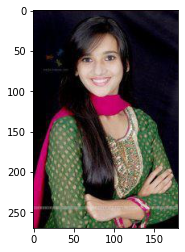

In [166]:
plt.imshow(imread(train_path+'/without_mask/0.jpg'))

In [167]:
sam = imread(train_path+'/without_mask/0.jpg')
sam.shape

(270, 180, 3)

In [168]:
imread(train_path+'/without_mask/2.jpg').shape

(433, 320, 3)

In [0]:
#all the images have varying shape so lets find the avg height and width

In [0]:
avg_height= []
avg_width = []
for face in os.listdir(train_path+'/without_mask'):
    f_img = imread(train_path+'/without_mask/'+face)
    f_wid,f_hig,cc = f_img.shape
    avg_width.append(f_wid)
    avg_height.append(f_hig)

In [171]:
avg_width

[244,
 225,
 960,
 270,
 366,
 341,
 433,
 428,
 433,
 428,
 428,
 484,
 224,
 428,
 374,
 428,
 465,
 433,
 240,
 428,
 428,
 274,
 433,
 262,
 414,
 456,
 246,
 428,
 494,
 428,
 436,
 433,
 259,
 285,
 212,
 428,
 428,
 516,
 428,
 194,
 433,
 433,
 433,
 428,
 233,
 428,
 428,
 428,
 400,
 168,
 417,
 267,
 208,
 256,
 225,
 428,
 428,
 222,
 433,
 433,
 428,
 428,
 194,
 283,
 372,
 428,
 400,
 193,
 428,
 274,
 640,
 428,
 433,
 196,
 428,
 450,
 248,
 428,
 540,
 329,
 265,
 428,
 152,
 170,
 428,
 428,
 227,
 289,
 428,
 351,
 433,
 960,
 428,
 275,
 225,
 433,
 428,
 594,
 428,
 584,
 428,
 433,
 442,
 434,
 418,
 344,
 194,
 650,
 322,
 428,
 249,
 428,
 225,
 960,
 258,
 244,
 428,
 428,
 300,
 590,
 225,
 194,
 250,
 433,
 428,
 433,
 449,
 331,
 428,
 428,
 428,
 178,
 433,
 428,
 433,
 247,
 455,
 224,
 390,
 246,
 433,
 247,
 502,
 266,
 554,
 423,
 275,
 442,
 433,
 251,
 720,
 432,
 480,
 260,
 281,
 382,
 268,
 433,
 428,
 416,
 458,
 433,
 433,
 405,
 428,
 166,
 428

In [172]:
avg_height

[214,
 154,
 594,
 180,
 274,
 324,
 320,
 320,
 320,
 320,
 320,
 428,
 225,
 320,
 296,
 320,
 379,
 320,
 225,
 320,
 320,
 184,
 327,
 192,
 338,
 341,
 205,
 320,
 441,
 320,
 322,
 327,
 195,
 236,
 238,
 320,
 320,
 740,
 320,
 259,
 320,
 327,
 320,
 320,
 203,
 320,
 320,
 320,
 273,
 300,
 340,
 189,
 165,
 197,
 225,
 320,
 320,
 110,
 327,
 327,
 320,
 320,
 259,
 188,
 285,
 320,
 295,
 261,
 320,
 184,
 480,
 320,
 327,
 257,
 320,
 503,
 203,
 320,
 720,
 207,
 190,
 320,
 270,
 296,
 320,
 320,
 222,
 201,
 320,
 312,
 327,
 768,
 320,
 183,
 225,
 320,
 320,
 512,
 320,
 374,
 320,
 320,
 318,
 321,
 300,
 266,
 259,
 797,
 309,
 320,
 202,
 320,
 225,
 956,
 196,
 206,
 320,
 320,
 300,
 513,
 225,
 260,
 226,
 327,
 320,
 320,
 313,
 264,
 320,
 320,
 320,
 150,
 327,
 320,
 320,
 204,
 297,
 225,
 345,
 205,
 320,
 209,
 377,
 189,
 353,
 313,
 183,
 318,
 327,
 205,
 720,
 408,
 480,
 194,
 179,
 341,
 188,
 320,
 320,
 351,
 317,
 320,
 320,
 277,
 320,
 303,
 320

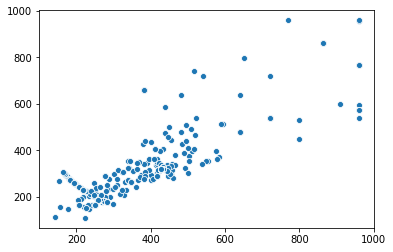

In [173]:
sns.scatterplot(avg_width,avg_height)

In [174]:
np.mean(avg_width)

390.20917431192663

In [175]:
np.mean(avg_height)

320.2862385321101

In [176]:
preprocess_input(sam)

array([[[-0.94509804, -0.9764706 , -0.85882354],
        [-0.94509804, -0.9764706 , -0.85882354],
        [-0.94509804, -0.9764706 , -0.85882354],
        ...,
        [-0.8509804 , -0.90588236, -0.78039217],
        [-0.8509804 , -0.90588236, -0.78039217],
        [-0.84313726, -0.8980392 , -0.77254903]],

       [[-0.9137255 , -0.94509804, -0.827451  ],
        [-0.9137255 , -0.94509804, -0.827451  ],
        [-0.9137255 , -0.94509804, -0.827451  ],
        ...,
        [-0.7647059 , -0.79607844, -0.6784314 ],
        [-0.7647059 , -0.79607844, -0.6784314 ],
        [-0.75686276, -0.7882353 , -0.67058825]],

       [[-0.8980392 , -0.92941177, -0.79607844],
        [-0.8980392 , -0.92941177, -0.79607844],
        [-0.8980392 , -0.92941177, -0.79607844],
        ...,
        [-0.8509804 , -0.88235295, -0.7647059 ],
        [-0.84313726, -0.8745098 , -0.75686276],
        [-0.8352941 , -0.8666667 , -0.7490196 ]],

       ...,

       [[ 0.3411765 , -0.9607843 , -0.3960784 ],
        [ 0

In [0]:
# using image data generator lets generate our training and testing images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

In [0]:
img_gen = ImageDataGenerator(rotation_range=20,#in degrees
    width_shift_range=0.1,#the images will have a max width shift of 10%
    height_shift_range=0.1,
    shear_range=0.1, # max of 10% of the image will be cut
    zoom_range=0.1, # zoom upto 10%
    fill_mode='nearest',# fill up the empty spaces with nearest pixel values
    rescale = 1/255,
    horizontal_flip=True)

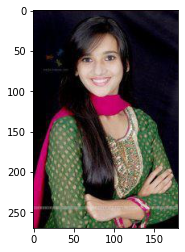

In [180]:
plt.imshow(sam)

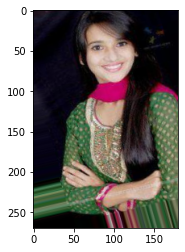

In [181]:
plt.imshow(img_gen.random_transform(sam))

In [182]:
img_gen.flow_from_directory(train_path)

Found 1090 images belonging to 2 classes.


In [183]:
img_gen.flow_from_directory(test_path)

Found 306 images belonging to 2 classes.


In [184]:
train_imgs = img_gen.flow_from_directory(train_path)

Found 1090 images belonging to 2 classes.


In [185]:
train_imgs.class_indices

{'with_mask': 0, 'without_mask': 1}

In [0]:
#the categories have been assigned according to the folder names where 'with_mask': 0, 'without_mask': 1

In [0]:
new_shape = (224,224,3)

In [188]:
train_imgs = img_gen.flow_from_directory(train_path,
                                         target_size=new_shape[0:2],
                                         color_mode='rgb',
                                        batch_size=32,
                                        shuffle=False)

Found 1090 images belonging to 2 classes.


In [189]:
test_imgs = img_gen.flow_from_directory(test_path,
                                         target_size=new_shape[0:2],
                                         color_mode='rgb',
                                        batch_size=32,
                                        shuffle=False)

Found 306 images belonging to 2 classes.


In [190]:
train_imgs[0][0].shape

(32, 224, 224, 3)

In [191]:
train_imgs[0][0]

array([[[[0.24697968, 0.2619229 , 0.17685857],
         [0.2223867 , 0.24820776, 0.155817  ],
         [0.19424115, 0.2254567 , 0.12472946],
         ...,
         [0.39361307, 0.24829184, 0.11069211],
         [0.23849115, 0.15927644, 0.03940823],
         [0.199926  , 0.1739381 , 0.07584892]],

        [[0.22863784, 0.24365084, 0.16147338],
         [0.20127669, 0.22305454, 0.1337212 ],
         [0.17498606, 0.19898942, 0.10210055],
         ...,
         [0.450035  , 0.28190407, 0.136702  ],
         [0.31263828, 0.2039755 , 0.06860071],
         [0.16432971, 0.11158987, 0.        ]],

        [[0.20653681, 0.21691689, 0.13616733],
         [0.18021536, 0.19826986, 0.11190013],
         [0.16259994, 0.18180373, 0.08946597],
         ...,
         [0.49503997, 0.32430518, 0.17860548],
         [0.38709033, 0.2644007 , 0.11726176],
         [0.2621164 , 0.19872169, 0.06845289]],

        ...,

        [[0.11993957, 0.16719152, 0.19980688],
         [0.13420102, 0.17254902, 0.2061078 ]

In [192]:
preprocess_input(train_imgs[0][0])

array([[[[-0.9999015 , -0.99985605, -0.9999979 ],
         [-0.99988544, -0.99980277, -0.99999255],
         [-0.99986947, -0.9997495 , -0.99998724],
         ...,
         [-0.99862957, -0.9983699 , -0.998973  ],
         [-0.9985971 , -0.9983451 , -0.99906534],
         [-0.9982841 , -0.9980928 , -0.9989404 ]],

        [[-0.99945706, -0.9996235 , -1.        ],
         [-0.99954236, -0.99967146, -1.        ],
         [-0.9996276 , -0.9997194 , -1.        ],
         ...,
         [-0.99863917, -0.9983699 , -0.99899703],
         [-0.9985875 , -0.99834025, -0.99907494],
         [-0.99824685, -0.9980623 , -0.9989235 ]],

        [[-0.99844724, -0.9987978 , -0.99944663],
         [-0.9986337 , -0.99895227, -0.9995532 ],
         [-0.9988202 , -0.9991068 , -0.9996598 ],
         ...,
         [-0.9986446 , -0.9983688 , -0.9990179 ],
         [-0.99854517, -0.9983064 , -0.9990591 ],
         [-0.99824685, -0.9980623 , -0.9989235 ]],

        ...,

        [[-0.999979  , -0.9997009 , -0

In [193]:
len(train_imgs)

35

In [0]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [0]:
# len(data)

In [0]:
#the data has been reshaped accroding to the new shape and batch size

In [0]:
#importing the mobilenetv2 architecture and building the model on top of that so that its faster to train

In [0]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential,Model

In [207]:
base_model = MobileNetV2(weights="imagenet", include_top=False,
                          input_tensor=Input(shape=(224,224,3)))


In [208]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
f_model = base_model.output
f_model = MaxPool2D(pool_size=(7,7))(f_model)
f_model = (Flatten())(f_model)
f_model  = (Dense(128,activation='relu'))(f_model)
f_model  = (Dropout(0.5))(f_model)
f_model  = (Dense(2,activation='softmax'))(f_model)

In [0]:
model = Model(inputs = base_model.input,outputs = f_model)

In [0]:
for layer in base_model.layers:
  layer.trainable = False

In [212]:
base_model.layers

In [0]:
#base_model.trainable = False

In [214]:
base_model.trainable

True

In [215]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
#the model has been built with the mobilenet model set to not trainable as its preloaded with imagenet weights

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [218]:
model.fit(train_imgs,validation_data=test_imgs,epochs=10)

Epoch 1/10
35/35 [==============================] - 22s 615ms/step - loss: 1.9375 - accuracy: 0.7826 - val_loss: 0.0526 - val_accuracy: 0.9739
Epoch 2/10
35/35 [==============================] - 21s 590ms/step - loss: 0.0810 - accuracy: 0.9789 - val_loss: 0.0475 - val_accuracy: 0.9869
Epoch 3/10
35/35 [==============================] - 21s 588ms/step - loss: 0.0347 - accuracy: 0.9862 - val_loss: 0.0428 - val_accuracy: 0.9869
Epoch 4/10
35/35 [==============================] - 21s 595ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0504 - val_accuracy: 0.9837
Epoch 5/10
35/35 [==============================] - 21s 588ms/step - loss: 0.0286 - accuracy: 0.9890 - val_loss: 0.1659 - val_accuracy: 0.9542
Epoch 6/10
35/35 [==============================] - 21s 590ms/step - loss: 0.0815 - accuracy: 0.9670 - val_loss: 0.0618 - val_accuracy: 0.9804
Epoch 7/10
35/35 [==============================] - 21s 591ms/step - loss: 0.0623 - accuracy: 0.9844 - val_loss: 0.0536 - val_accuracy: 0.9804

In [0]:
model.save('fmask2.h5')

In [220]:
model.history.history

{'accuracy': [0.7825688123703003,
  0.9788990616798401,
  0.9862385392189026,
  0.9908257126808167,
  0.988990843296051,
  0.9669724702835083,
  0.984403669834137,
  0.9862385392189026,
  0.9963302612304688,
  0.9944953918457031],
 'loss': [1.9375122785568237,
  0.08100220561027527,
  0.03474533185362816,
  0.028481895104050636,
  0.02857283316552639,
  0.08147860318422318,
  0.06227319687604904,
  0.025271402671933174,
  0.012545648962259293,
  0.01789756491780281],
 'val_accuracy': [0.9738562107086182,
  0.9869281053543091,
  0.9869281053543091,
  0.983660101890564,
  0.9542483687400818,
  0.9803921580314636,
  0.9803921580314636,
  0.9934640526771545,
  0.9869281053543091,
  0.9869281053543091],
 'val_loss': [0.05261974781751633,
  0.047473613172769547,
  0.04284219443798065,
  0.05043543875217438,
  0.16593262553215027,
  0.06175713613629341,
  0.053625356405973434,
  0.04027944803237915,
  0.028686491772532463,
  0.06420967727899551]}

In [221]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.937512,0.782569,0.052620,0.973856
1,0.081002,0.978899,0.047474,0.986928
2,0.034745,0.986239,0.042842,0.986928
3,0.028482,0.990826,0.050435,0.983660
4,0.028573,0.988991,0.165933,0.954248
5,0.081479,0.966972,0.061757,0.980392
6,0.062273,0.984404,0.053625,0.980392
7,0.025271,0.986239,0.040279,0.993464
8,0.012546,0.996330,0.028686,0.986928
9,0.017898,0.994495,0.064210,0.986928


In [0]:
history = pd.DataFrame(model.history.history)

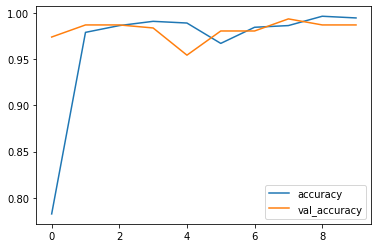

In [223]:
history[['accuracy','val_accuracy']].plot()

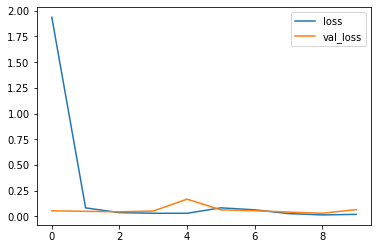

In [224]:
history[['loss','val_loss']].plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
pred = model.predict(test_imgs)

In [233]:
len(pred)

306

In [228]:
test_imgs.class_indices

{'with_mask': 0, 'without_mask': 1}

In [235]:
test_imgs[0][1]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [234]:
len(test_imgs[0][1])

32

In [239]:
pred[0:32]

array([[9.99999404e-01, 5.83335009e-07],
       [9.95458484e-01, 4.54159128e-03],
       [9.99977350e-01, 2.27075816e-05],
       [9.99519944e-01, 4.80053714e-04],
       [8.84677052e-01, 1.15322940e-01],
       [9.87991989e-01, 1.20080067e-02],
       [9.99585092e-01, 4.14899696e-04],
       [9.99998212e-01, 1.76928859e-06],
       [9.99999881e-01, 6.94571725e-08],
       [9.99987125e-01, 1.29336549e-05],
       [1.00000000e+00, 3.56384100e-09],
       [1.00000000e+00, 1.87996552e-09],
       [9.99999523e-01, 4.31798696e-07],
       [1.00000000e+00, 3.00077879e-10],
       [9.99999523e-01, 4.72658229e-07],
       [9.99999285e-01, 6.88533760e-07],
       [9.99813974e-01, 1.86084115e-04],
       [9.99999881e-01, 7.38648893e-08],
       [1.00000000e+00, 4.63459759e-09],
       [9.99940515e-01, 5.94664052e-05],
       [9.99999881e-01, 1.52507411e-07],
       [1.00000000e+00, 1.71789747e-08],
       [9.99999881e-01, 1.13138960e-07],
       [9.99986172e-01, 1.37944580e-05],
       [9.971655

In [240]:
pred[10]

array([1.000000e+00, 3.563841e-09], dtype=float32)

In [241]:
pred[-32:]

array([[7.6853088e-03, 9.9231476e-01],
       [4.0556964e-02, 9.5944303e-01],
       [8.2402676e-02, 9.1759735e-01],
       [2.7683118e-04, 9.9972314e-01],
       [8.2146293e-08, 9.9999988e-01],
       [1.8487391e-07, 9.9999976e-01],
       [1.1041644e-07, 9.9999988e-01],
       [2.4350475e-06, 9.9999762e-01],
       [1.9373160e-03, 9.9806267e-01],
       [9.2834728e-03, 9.9071652e-01],
       [8.6185805e-09, 1.0000000e+00],
       [1.4138111e-06, 9.9999857e-01],
       [5.3818116e-08, 1.0000000e+00],
       [3.2970202e-09, 1.0000000e+00],
       [5.0280292e-08, 1.0000000e+00],
       [1.2435967e-08, 1.0000000e+00],
       [5.4736966e-09, 1.0000000e+00],
       [5.1772179e-07, 9.9999952e-01],
       [4.8677684e-06, 9.9999511e-01],
       [1.7641787e-07, 9.9999988e-01],
       [2.2129785e-09, 1.0000000e+00],
       [6.2358434e-09, 1.0000000e+00],
       [4.0776900e-08, 1.0000000e+00],
       [3.2023169e-07, 9.9999964e-01],
       [1.0501897e-06, 9.9999893e-01],
       [3.5978189e-06, 9.

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img
#make sure to scale the img array(1/255)

In [253]:
new_face_img2 = load_img(test_path+'/with_mask/augmented_image_138.jpg',target_size=(224,224,3))
new_face_arr2 = img_to_array(new_face_img2)
new_face_arr2 = new_face_arr2/255
new_face_arr2 = np.expand_dims(new_face_arr2,axis=0)
model.predict(new_face_arr2.reshape(1,224,224,3))

array([[9.9999213e-01, 7.8348730e-06]], dtype=float32)

In [248]:
len(test_imgs[0][0][0])

224

1